# Kaggle 필사 : Avocado Price Regression w/ PyCaret & EDA 

In [4]:
!pip install pycaret
!pip install markupsafe==2.0.1
!pip install jinja2

  Using cached markupsafe-3.0.3-cp310-cp310-win_amd64.whl.metadata (2.8 kB)
Using cached markupsafe-3.0.3-cp310-cp310-win_amd64.whl (15 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.0.1
    Uninstalling MarkupSafe-2.0.1:
      Successfully uninstalled MarkupSafe-2.0.1
  Using cached MarkupSafe-2.0.1-cp310-cp310-win_amd64.whl.metadata (3.2 kB)
Using cached MarkupSafe-2.0.1-cp310-cp310-win_amd64.whl (15 kB)
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.3
    Uninstalling MarkupSafe-3.0.3:
      Successfully uninstalled MarkupSafe-3.0.3


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
flask 3.1.2 requires markupsafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.
werkzeug 3.1.3 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [2]:
# --- Importing Libraries ---
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import pycaret
import warnings
import jinja2

from sklearn.preprocessing import LabelEncoder
from scipy import stats
from scipy.stats import *
from pycaret.regression import *

# --- Libraries Settings ---
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
plt.rcParams['figure.dpi'] = 100

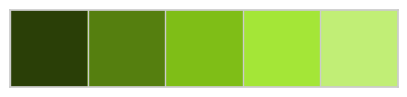

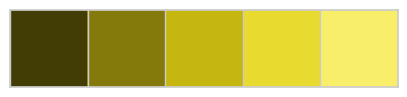

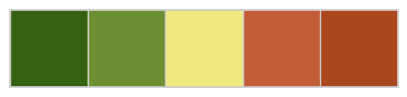

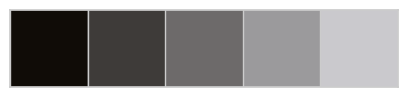

In [3]:
# --- Create List of Color Palletes ---
olive_grad = ['#2A3F07', '#557F0F', '#7FBE17', '#A4E637', '#C1EE76']
yellow_grad = ['#413D05', '#837A0B', '#C5B710', '#E8DA2E', '#F9EE6A']
color_mix = ['#356211', '#6C8F32', '#F2E880', '#C15C37', '#AA471F']
black_grad = ['#100C07', '#3E3B39', '#6D6A6A', '#9B9A9C', '#CAC9CD']

# --- Plot Color Palletes --
sns.palplot(olive_grad)
sns.palplot(yellow_grad)
sns.palplot(color_mix)
sns.palplot(black_grad)

In [5]:
# --- Reading Dataset ---
ds = pd.read_csv('avocado.csv')
ds.head().style.background_gradient(cmap='Greens').set_properties(**{'font-family': 'Segoe UI'})

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.330000,64236.620000,1036.740000,54454.850000,48.160000,8696.870000,8603.620000,93.250000,0.000000,conventional,2015,Albany
1,1,2015-12-20,1.350000,54876.980000,674.280000,44638.810000,58.330000,9505.560000,9408.070000,97.490000,0.000000,conventional,2015,Albany
2,2,2015-12-13,0.930000,118220.220000,794.700000,109149.670000,130.500000,8145.350000,8042.210000,103.140000,0.000000,conventional,2015,Albany
3,3,2015-12-06,1.080000,78992.150000,1132.000000,71976.410000,72.580000,5811.160000,5677.400000,133.760000,0.000000,conventional,2015,Albany
4,4,2015-11-29,1.280000,51039.600000,941.480000,43838.390000,75.780000,6183.950000,5986.260000,197.690000,0.000000,conventional,2015,Albany


In [6]:
# --- Print Dataset Info ---
print('\033[92m\033[1m'+'.: Imported Dataset Info :.'+'\033[0m')
print('\033[92m*' * 30+'\033[0m')
print('Total Rows:'+'\033[92m\033[1m', ds.shape[0])
print('\033[0m'+'Total Columns:'+'\033[92m\033[1m', ds.shape[1])
print('\033[0m\033[92m'+'*' * 30+'\033[0m')
print('\n')

# --- Print Dataset Detail ---
print('\033[92m\033[1m'+'.: Dataset Details :.'+'\033[0m')
print('\033[0m\033[92m'+'*' * 30+'\033[0m')
ds.info(memory_usage = False)

.: Imported Dataset Info :.
******************************
Total Rows: 18249
Total Columns: 14
******************************


.: Dataset Details :.
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), in

****************************************
.: Total Avocado based on each Type :.
****************************************


type
conventional    9126
organic         9123
Name: count, dtype: int64

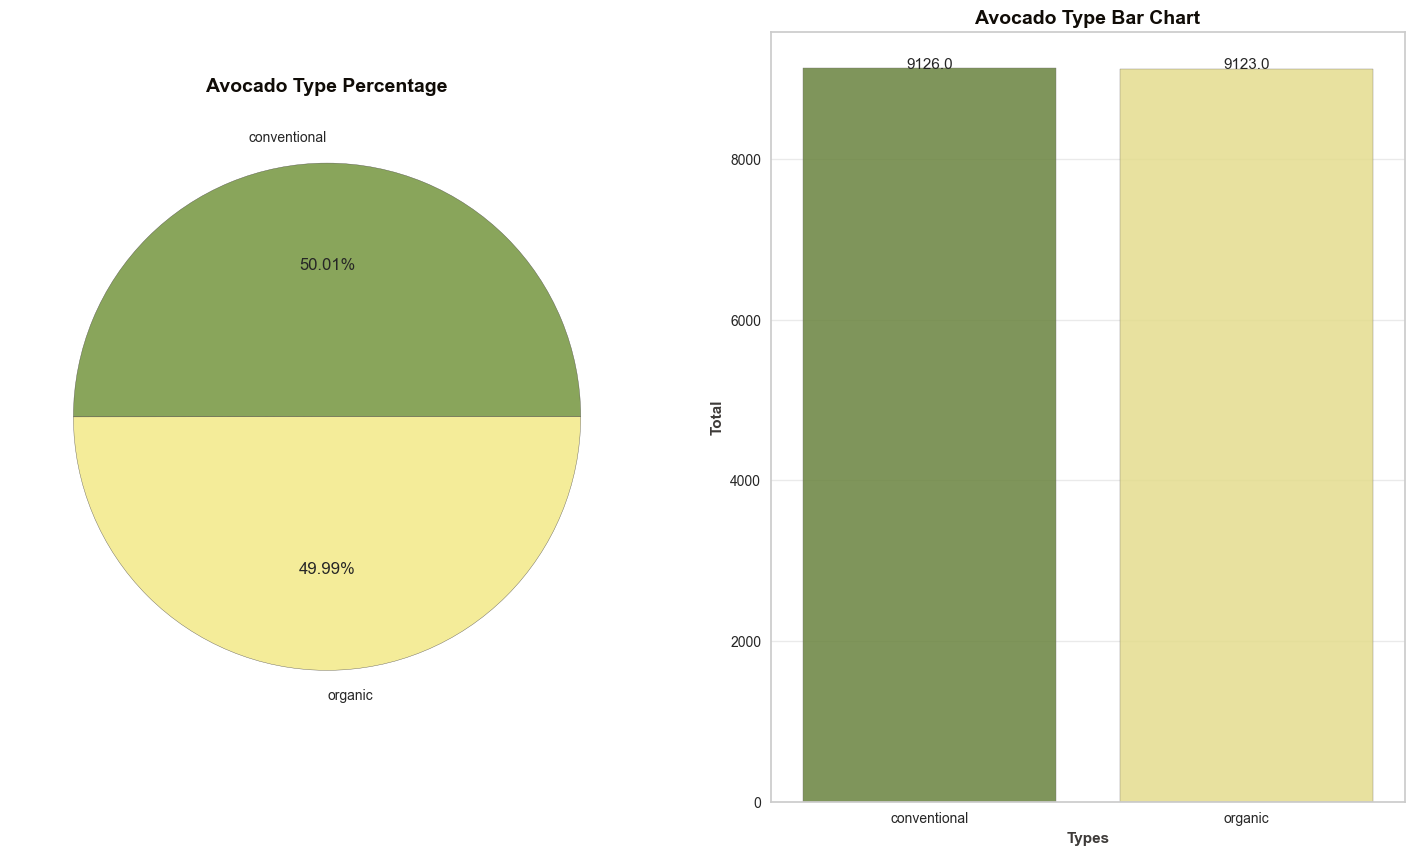

In [7]:
# --- Colors and Labels (Null Values Dropped) ---
colors = color_mix[1:3]
labels = ds['type'].dropna().unique()
order = ds['type'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18, 10))

# --- Pie Chart ---
plt.subplot(1, 2, 1)
plt.title('Avocado Type Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', 
          color = black_grad[0])
plt.pie(ds['type'].value_counts(), labels = order, colors = colors, 
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%')

# --- Bar Chart ---
countplt = plt.subplot(1, 2, 2)
plt.title('Avocado Type Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
ax = sns.countplot(x = 'type', data = ds, palette = colors, order = order, edgecolor = black_grad[2], alpha = 0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+0.75,rect.get_height(), horizontalalignment = 'center', 
             fontsize = 11)

plt.xlabel('Types', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[92m'+'*' * 40)
print('\033[92m\033[1m'+'.: Total Avocado based on each Type :.'+'\033[0m')
print('\033[92m'+'*' * 40+'\033[0m')
ds.type.value_counts(dropna=False)

***********************************
.: Total Avocado based on Year :.
***********************************


year
2017    5722
2016    5616
2015    5615
2018    1296
Name: count, dtype: int64

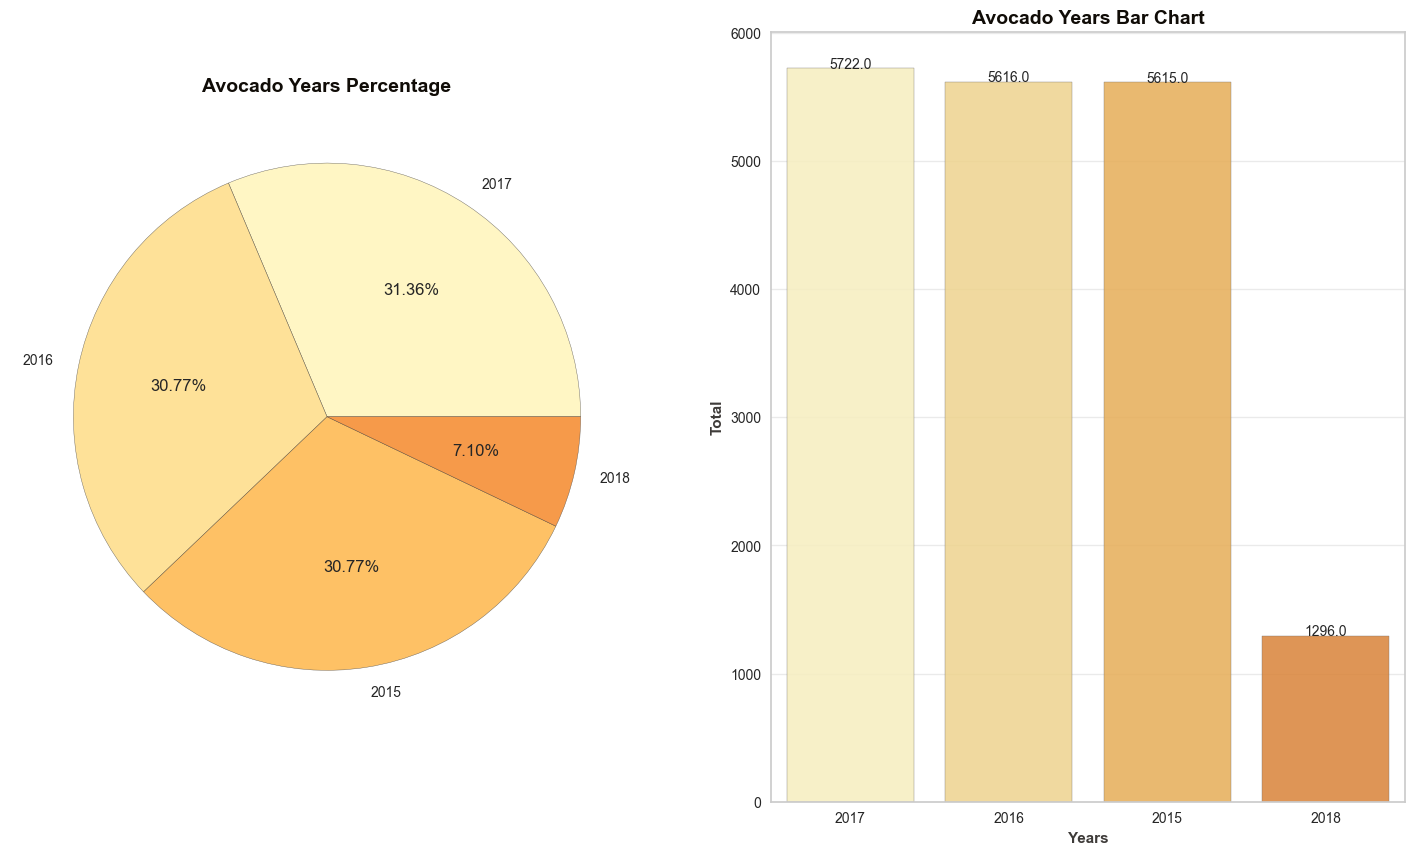

In [8]:
# --- Colors and Labels (Null Values Dropped) ---
colors = sns.color_palette('YlOrBr')
labels = ds['year'].dropna().unique()
order = ds['year'].value_counts().index

# --- Size for Both Figures ---
plt.figure(figsize=(18,10))

# --- Pie Chart ---
plt.subplot(1,2,1)
plt.title('Avocado Years Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
plt.pie(ds['year'].value_counts(), labels = order, colors = colors, 
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%')

# --- Bar Chart ---
countplt = plt.subplot(1,2,2)
plt.title('Avocado Years Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
ax = sns.countplot(x = 'year', data = ds, palette = colors, order = order, edgecolor = black_grad[2], alpha = 0.85)
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, rect.get_height()+0.75,rect.get_height(), horizontalalignment = 'center',
             fontsize = 10)

plt.xlabel('Years', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total', fontweight = 'bold', fontsize = '11', fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'y', alpha = 0.4)
countplt

# --- Count Categorical Labels w/out Dropping Null Walues ---
print('\033[92m'+'*' * 35)
print('\033[92m\033[1m'+'.: Total Avocado based on Year :.'+'\033[0m')
print('\033[92m'+'*' * 35+'\033[0m')
ds.year.value_counts(dropna=False)

In [9]:
# --- Count Categorical Labels w/Out Dropping Null Walues ---
print('\033[92m'+'*' * 38)
print('\033[92m\033[1m'+'.: Total Avocado based on Regions :.'+'\033[0m')
print('\033[92m'+'*' * 38)
ds.region.value_counts(dropna=False)

**************************************
.: Total Avocado based on Regions :.
**************************************


region
Albany                 338
Sacramento             338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland               338
RaleighGreensboro      338
RichmondNorfolk        338
Roanoke                338
SanDiego               338
Atlanta                338
SanFrancisco           338
Seattle                338
SouthCarolina          338
SouthCentral           338
Southeast              338
Spokane                338
StLouis                338
Syracuse               338
Tampa                  338
TotalUS                338
West                   338
NewYork                338
NewOrleansMobile       338
Nashville              338
Midsouth               338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago              

([<matplotlib.patches.Wedge at 0x1ccbcf69ea0>,
 [Text(1.0981383624650298, 0.06396981227597234, 'Albany'),
  Text(1.083283048431091, 0.1910440707843171, 'Sacramento'),
  Text(1.0537733789696964, 0.31553393759592474, 'Northeast'),
  Text(1.0100085527810017, 0.43575534799842297, 'NorthernNewEngland'),
  Text(0.9525806084085056, 0.5500819797849059, 'Orlando'),
  Text(0.8822664153043068, 0.6569672536938874, 'Philadelphia'),
  Text(0.8000171645526156, 0.7549652551086, 'PhoenixTucson'),
  Text(0.7069455014181233, 0.8427502939926386, 'Pittsburgh'),
  Text(0.604310473786581, 0.9191348384605157, 'Plains'),
  Text(0.4935005001109477, 0.9830855793827131, 'Portland'),
  Text(0.3760145872680516, 1.0337374087076645, 'RaleighGreensboro'),
  Text(0.2534420524054401, 1.0704051224057733, 'RichmondNorfolk'),
  Text(0.12744102309570132, 1.0925926897212526, 'Roanoke'),
  Text(-0.00028399335773690327, 1.0999999633398962, 'SanDiego'),
  Text(-0.12800516802706424, 1.0925267396994744, 'Atlanta'),
  Text(-0.2539

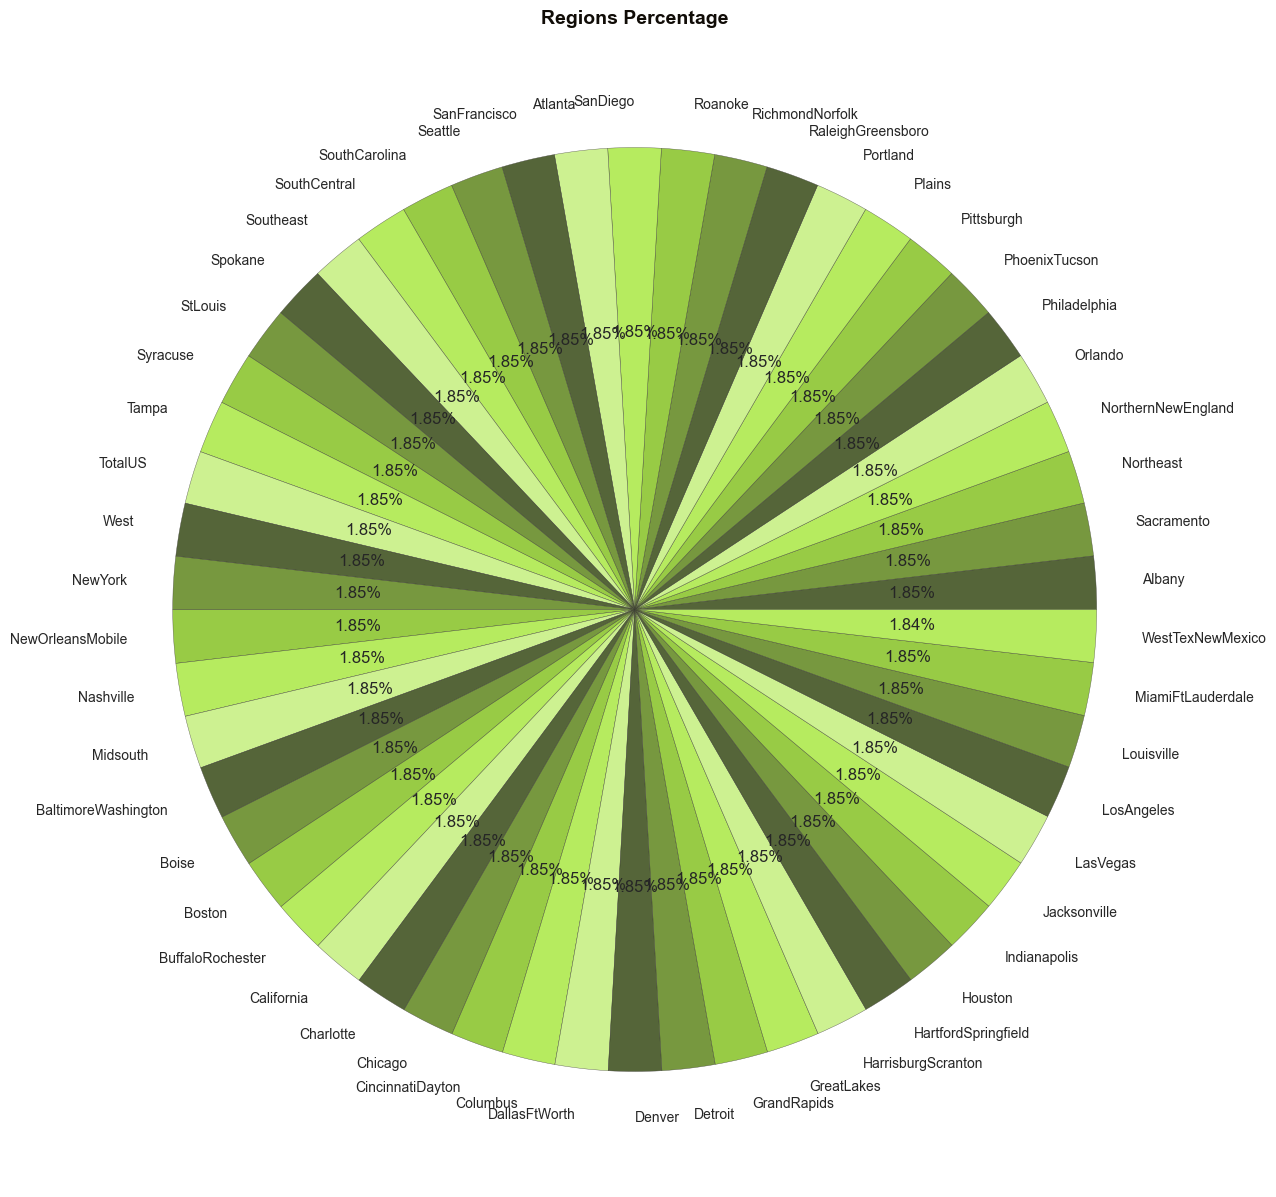

In [10]:
# --- Colors and Labels (Null Values Dropped) ---
colors = olive_grad[0:5]
labels = ds['region'].dropna().unique()
order = ds['region'].value_counts().index

# --- Pie Chart ---
plt.figure(figsize = (15, 15))
plt.title('Regions Percentage', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
plt.pie(ds['region'].value_counts(), labels = order, colors = colors, 
        wedgeprops = dict(alpha = 0.8, edgecolor = black_grad[1]), autopct = '%.2f%%')

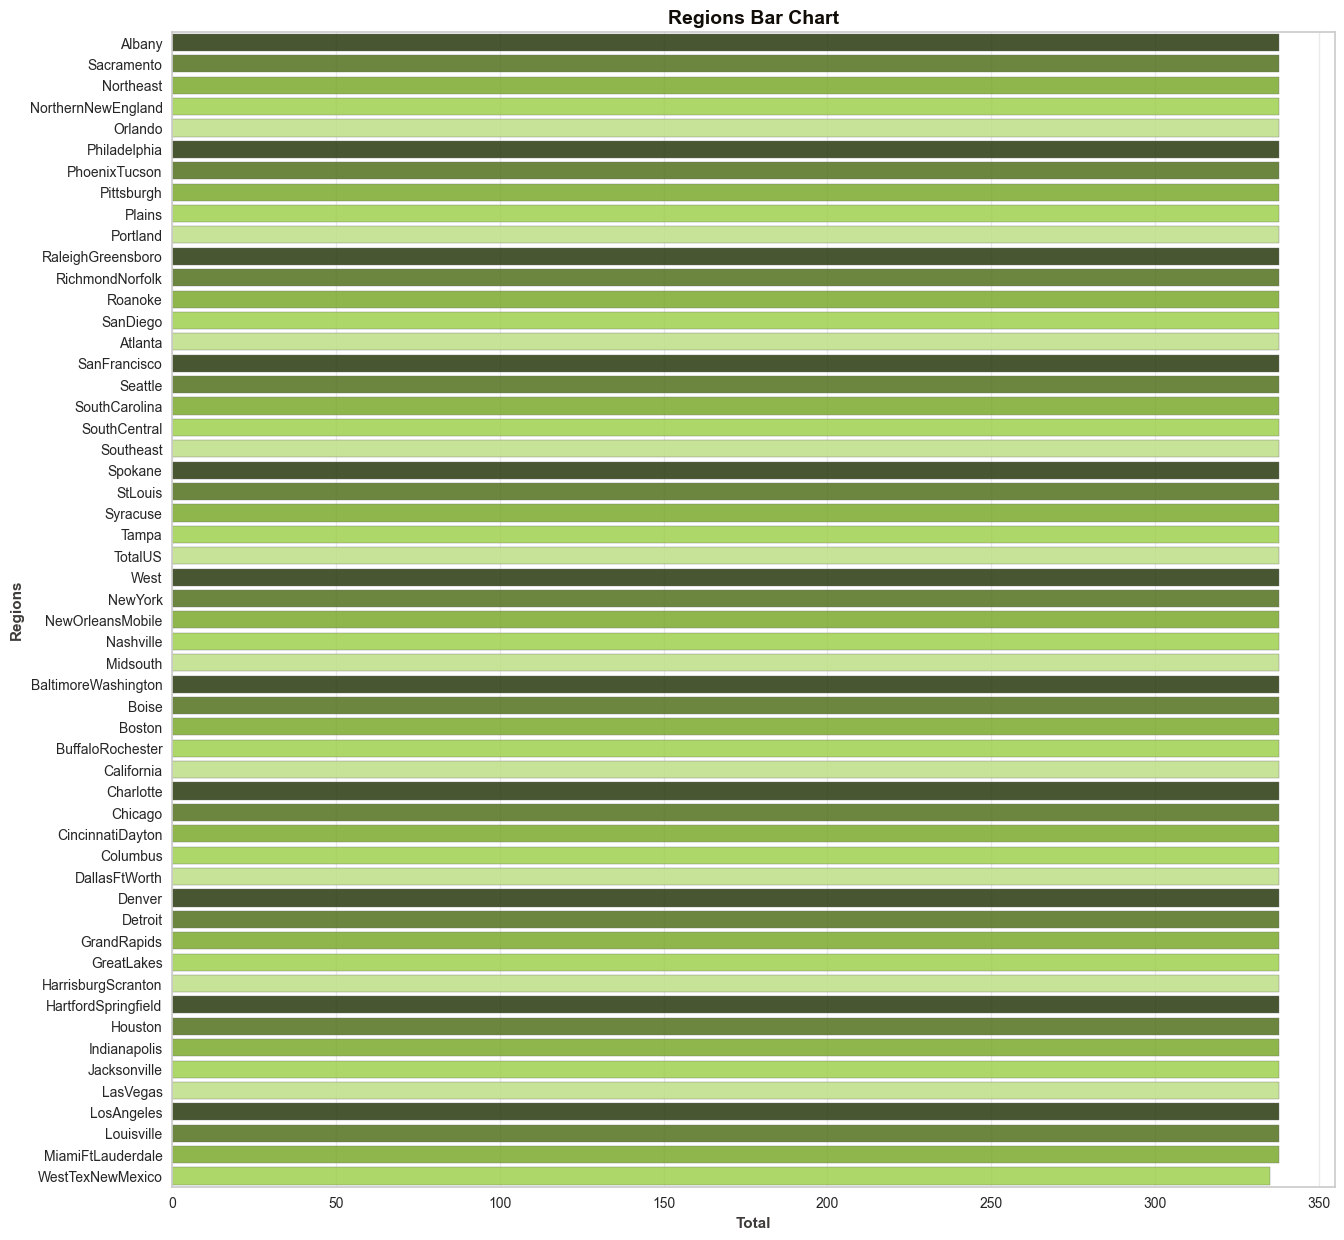

In [11]:
# --- Bar Chart ---
plt.figure(figsize = (15, 15))
plt.title('Regions Bar Chart', fontweight = 'bold', fontsize = 14, fontfamily = 'sans-serif', color = black_grad[0])
sns.countplot(y = 'region', data = ds, order = order, palette = colors, edgecolor = black_grad[2], alpha = 0.85)
plt.xlabel('Total', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Regions', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.grid(axis = 'x', alpha = 0.4)

In [12]:
# --- Descriptive Statistics ---
ds[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 
    'XLarge Bags']].describe().T.style.background_gradient(cmap='YlOrBr').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
AveragePrice,18249.000000,1.405978,0.402677,0.440000,1.100000,1.370000,1.660000,3.250000
Total Volume,18249.000000,850644.013009,3453545.355399,84.560000,10838.580000,107376.760000,432962.290000,62505646.520000
4046,18249.000000,293008.424531,1264989.081763,0.000000,854.070000,8645.300000,111020.200000,22743616.170000
4225,18249.000000,295154.568356,1204120.401135,0.000000,3008.780000,29061.020000,150206.860000,20470572.610000
4770,18249.000000,22839.735993,107464.068435,0.000000,0.000000,184.990000,6243.420000,2546439.110000
Total Bags,18249.000000,239639.202060,986242.399216,0.000000,5088.640000,39743.830000,110783.370000,19373134.370000
Small Bags,18249.000000,182194.686696,746178.514962,0.000000,2849.420000,26362.820000,83337.670000,13384586.800000
Large Bags,18249.000000,54338.088145,243965.964547,0.000000,127.470000,2647.710000,22029.250000,5719096.610000
XLarge Bags,18249.000000,3106.426507,17692.894652,0.000000,0.000000,0.000000,132.500000,551693.650000


<Axes: xlabel='XLarge Bags'>

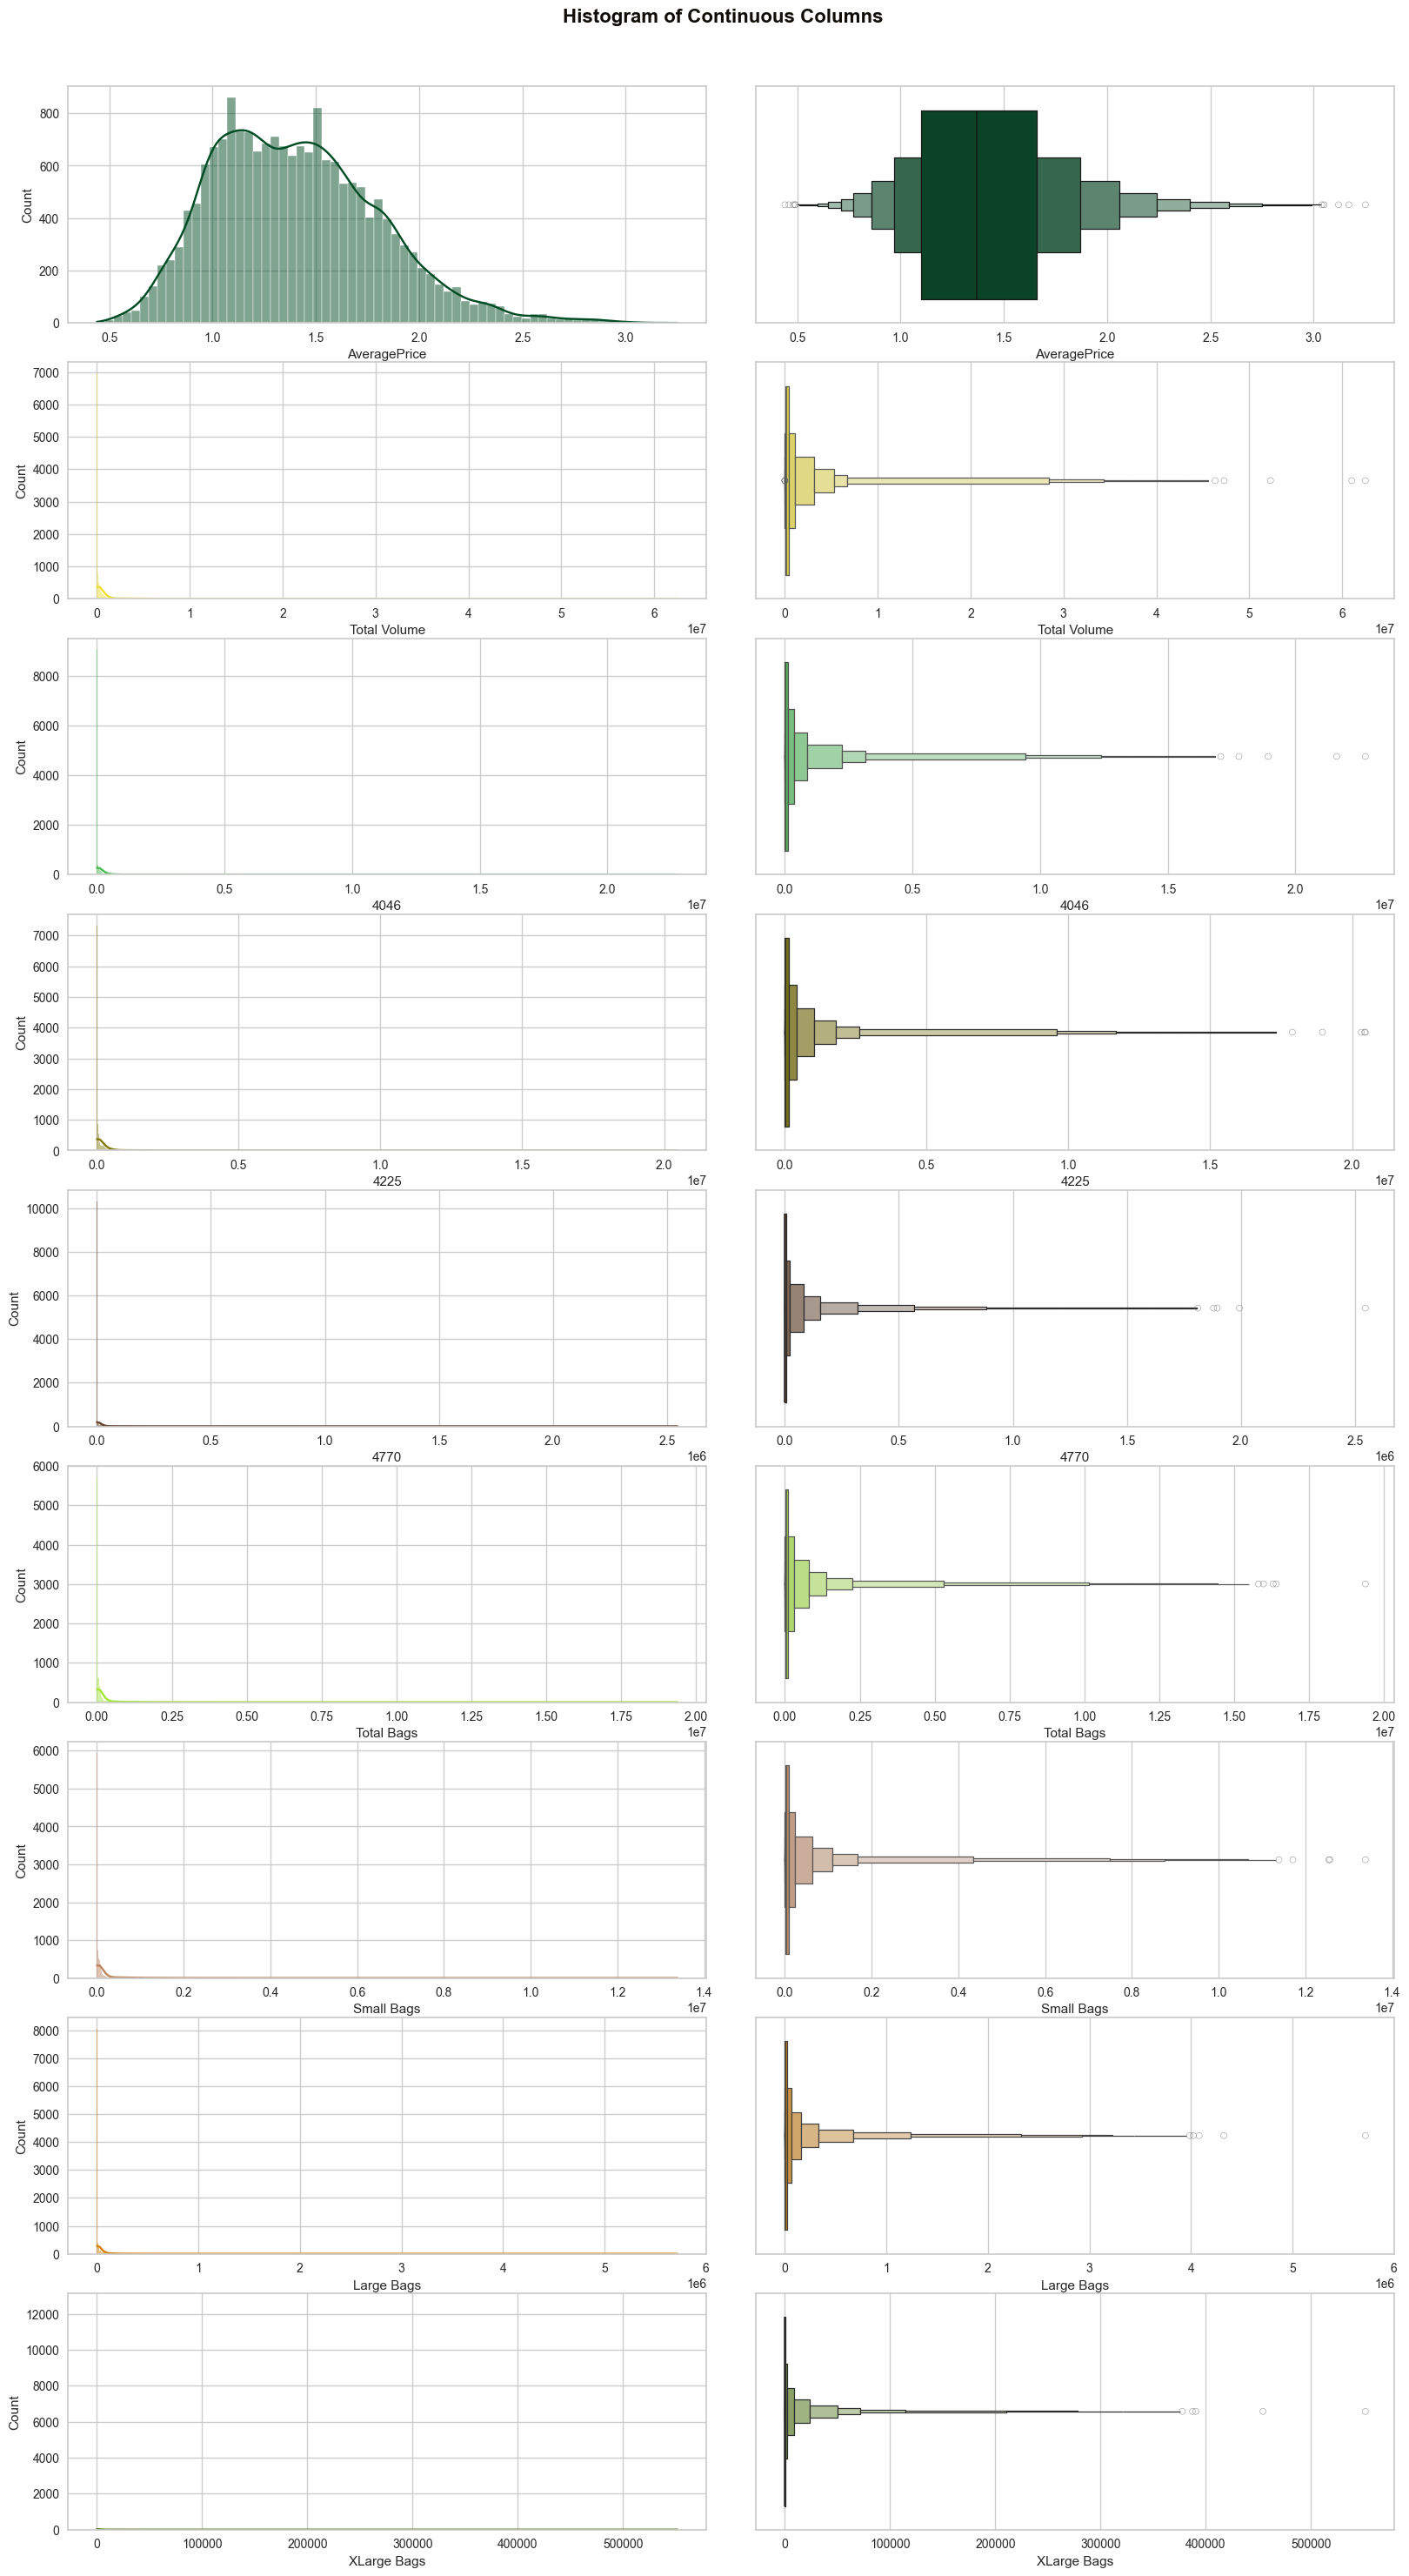

In [13]:
# --- Plot Size ---
fig, axs = plt.subplots(9, 2, figsize = (16, 30))

# --- General Title ---
fig.tight_layout()
fig.subplots_adjust(top = 0.95)
fig.suptitle('Histogram of Continuous Columns', fontweight = 'bold', fontsize = 16, fontfamily = 'sans-serif', 
             color = black_grad[0])

# --- Continuous Variables (Row 1) ---
sns.histplot(data = ds, x = 'AveragePrice', kde = True, ax = axs[0, 0], color = '#004D25')
sns.boxenplot(data = ds, x = 'AveragePrice', ax = axs[0, 1], color = '#004D25')

# --- Continuous Variables (Row 2) ---
sns.histplot(data = ds, x = 'Total Volume', kde = True, ax = axs[1, 0], color = '#EDDE30')
sns.boxenplot(data = ds, x = 'Total Volume', ax = axs[1, 1], color = '#EDDE30')

# --- Continuous Variables (Row 3) ---
sns.histplot(data = ds, x='4046', kde = True, ax = axs[2, 0], color = '#48BF53')
sns.boxenplot(data = ds, x = '4046', ax = axs[2, 1], color = '#48BF53')

# --- Continuous Variables (Row 4) ---
sns.histplot(data = ds, x = '4225', kde = True, ax = axs[3, 0], color = '#837A0B')
sns.boxenplot(data = ds, x = '4225', ax = axs[3, 1], color = '#837A0B')

# --- Continuous Variables (Row 5) ---
sns.histplot(data = ds, x = '4770', kde = True, ax = axs[4, 0], color = '#664228')
sns.boxenplot(data = ds, x = '4770', ax = axs[4, 1], color = '#664228')

# --- Continuous Variables (Row 6) ---
sns.histplot(data = ds, x = 'Total Bags', kde = True, ax = axs[5, 0], color = '#A4E637')
sns.boxenplot(data = ds, x = 'Total Bags', ax = axs[5, 1], color = '#A4E637')

# --- Continuous Variables (Row 7) ---
sns.histplot(data = ds, x = 'Small Bags', kde = True, ax = axs[6, 0], color = '#BF865D')
sns.boxenplot(data = ds, x = 'Small Bags', ax = axs[6, 1], color = '#BF865D')

# --- Continuous Variables (Row 8) ---
sns.histplot(data = ds, x = 'Large Bags', kde = True, ax = axs[7, 0], color = '#D98000')
sns.boxenplot(data = ds, x = 'Large Bags', ax = axs[7, 1], color = '#D98000')

# --- Continuous Variables (Row 9) ---
sns.histplot(data = ds, x = 'XLarge Bags', kde = True, ax = axs[8, 0], color = '#557F0F')
sns.boxenplot(data = ds, x = 'XLarge Bags', ax = axs[8, 1], color = '#557F0F')

In [14]:
# --- Skewness of Continuous Variables ---
print('\033[92m\033[1m'+'.: Continuous Columns Skewness :.'+'\033[0m')
print('\033[92m*' * 34+'\033[0m')
ds[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 
    'XLarge Bags']].skew(axis = 0, skipna = True)

.: Continuous Columns Skewness :.
**********************************


AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
dtype: float64

In [15]:
# --- Kurtoisis of Continuous Variables ---
print('\033[92m\033[1m'+'.: Continuous Columns Kurtosis :.'+'\033[0m')
print('\033[92m*' * 34+'\033[0m')
ds[['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 
    'XLarge Bags']].kurt(axis = 0, skipna = True)

.: Continuous Columns Kurtosis :.
**********************************


AveragePrice      0.325196
Total Volume     92.104458
4046             86.809113
4225             91.949022
4770            132.563441
Total Bags      112.272156
Small Bags      107.012885
Large Bags      117.999481
XLarge Bags     233.602612
dtype: float64

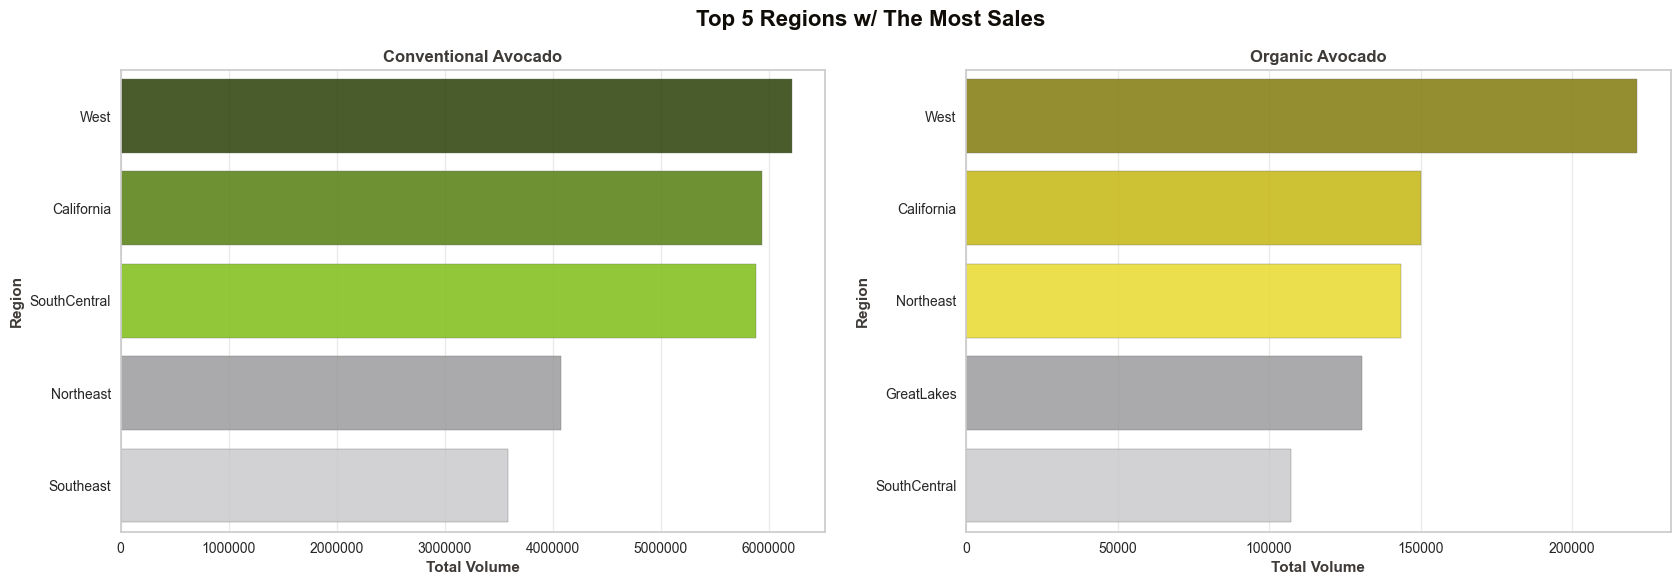

In [37]:
# --- General Settings of Bar Charts ---
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle(
    'Top 5 Regions w/ The Most Sales',
    fontweight='heavy', fontsize=16, fontfamily='sans-serif',
    color=black_grad[0]
)

# --- Bar Chart Left ---
plt.subplot(1, 2, 1)
plt.title('Conventional Avocado', fontweight='bold', fontsize=12, fontfamily='sans-serif', color=black_grad[1])
bar_left = sns.barplot(
    x='Total Volume', y='region', data=eda0,
    palette=black_grad, edgecolor=black_grad[2], alpha=0.85
)
bar_left.patches[0].set_facecolor(olive_grad[0])
bar_left.patches[1].set_facecolor(olive_grad[1])
bar_left.patches[2].set_facecolor(olive_grad[2])
plt.xlabel('Total Volume', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Region', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', alpha=0.4)
plt.ticklabel_format(style='plain', axis='x')

# --- Bar Chart Right ---
plt.subplot(1, 2, 2)
plt.title('Organic Avocado', fontweight='bold', fontsize=12, fontfamily='sans-serif', color=black_grad[1])
bar_right = sns.barplot(
    x='Total Volume', y='region', data=eda1,
    palette=black_grad, edgecolor=black_grad[2], alpha=0.85
)
bar_right.patches[0].set_facecolor(yellow_grad[1])
bar_right.patches[1].set_facecolor(yellow_grad[2])
bar_right.patches[2].set_facecolor(yellow_grad[3])
plt.xlabel('Total Volume', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Region', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', alpha=0.4)
plt.ticklabel_format(style='plain', axis='x')

plt.show()

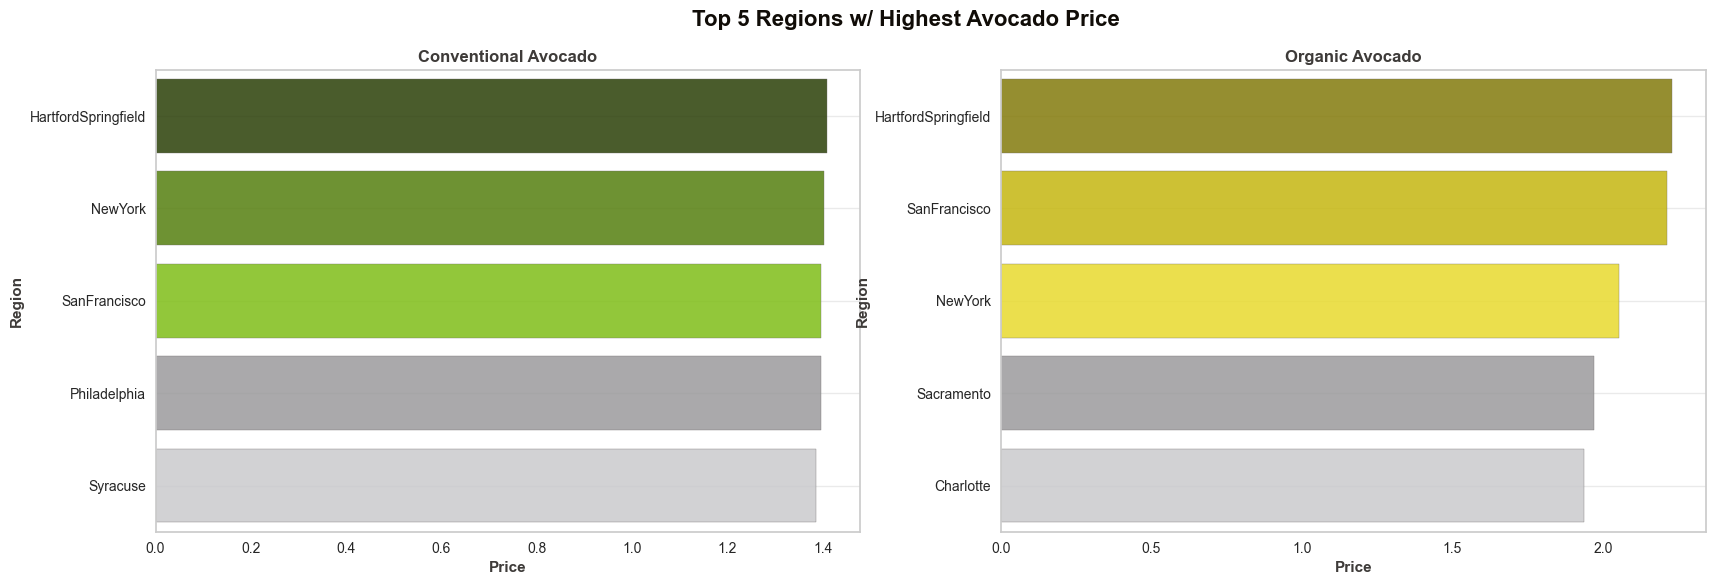

In [36]:
# --- Create New Dataframes based on Type ---
eda2 = ds.loc[ds['type'] == 'conventional', ['region', 'AveragePrice']]
eda2 = (
    eda2.groupby('region', as_index=False)['AveragePrice']
    .mean()
    .sort_values(by='AveragePrice', ascending=False)
    .iloc[:5]
)

eda3 = ds.loc[ds['type'] == 'organic', ['region', 'AveragePrice']]
eda3 = (
    eda3.groupby('region', as_index=False)['AveragePrice']
    .mean()
    .sort_values(by='AveragePrice', ascending=False)
    .iloc[:5]
)

# --- General Settings of Bar Charts ---
fig, ax = plt.subplots(1, 2, figsize=(20, 6))
fig.suptitle(
    'Top 5 Regions w/ Highest Avocado Price',
    fontweight='heavy',
    fontsize=16,
    fontfamily='sans-serif',
    color=black_grad[0]
)

# --- Bar Chart Left ---
plt.subplot(1, 2, 1)
plt.title('Conventional Avocado', fontweight='bold', fontsize=12, fontfamily='sans-serif', color=black_grad[1])
bar_left = sns.barplot(
    x='AveragePrice', y='region', data=eda2,
    palette=black_grad, edgecolor=black_grad[2], alpha=0.85
)
bar_left.patches[0].set_facecolor(olive_grad[0])
bar_left.patches[1].set_facecolor(olive_grad[1])
bar_left.patches[2].set_facecolor(olive_grad[2])
plt.xlabel('Price', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Region', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.ticklabel_format(style='plain', axis='x')

# --- Bar Chart Right ---
plt.subplot(1, 2, 2)
plt.title('Organic Avocado', fontweight='bold', fontsize=12, fontfamily='sans-serif', color=black_grad[1])
bar_right = sns.barplot(
    x='AveragePrice', y='region', data=eda3,
    palette=black_grad, edgecolor=black_grad[2], alpha=0.85
)
bar_right.patches[0].set_facecolor(yellow_grad[1])
bar_right.patches[1].set_facecolor(yellow_grad[2])
bar_right.patches[2].set_facecolor(yellow_grad[3])
plt.xlabel('Price', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Region', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.ticklabel_format(style='plain', axis='x')

plt.show()


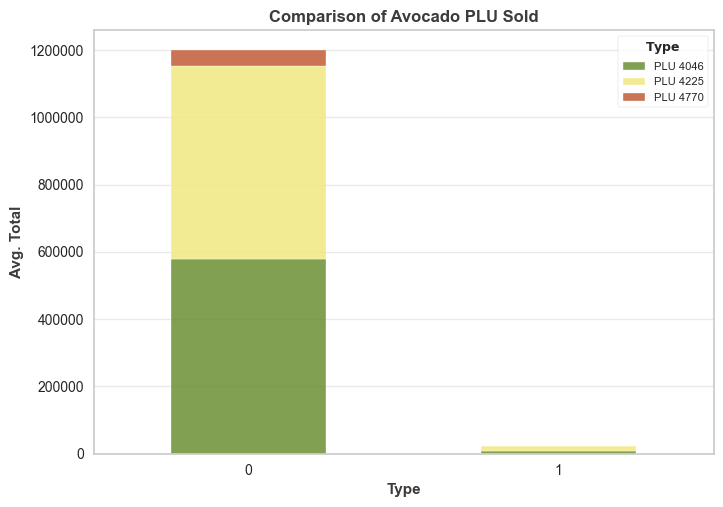

In [38]:
# --- Creating New Data Frame ---
eda30 = ds.loc[:, ['type', '4046', '4225', '4770']]  # xs 대신 loc 사용
eda30 = eda30.groupby('type', as_index=False).mean()  # 그룹별 평균 계산

# --- Stacked Bar Chart ---
eda30.plot(
    kind='bar', stacked=True, color=color_mix[-4:-1], alpha=0.85
)
plt.title(
    'Comparison of Avocado PLU Sold',
    fontweight='bold', fontsize=12, fontfamily='sans-serif', color=black_grad[1]
)
plt.xlabel('Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Avg. Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(
    labels=['PLU 4046','PLU 4225','PLU 4770'],
    title='$\\bf{Type}$', fontsize=8, title_fontsize=9,
    loc='upper right', frameon=True
)
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


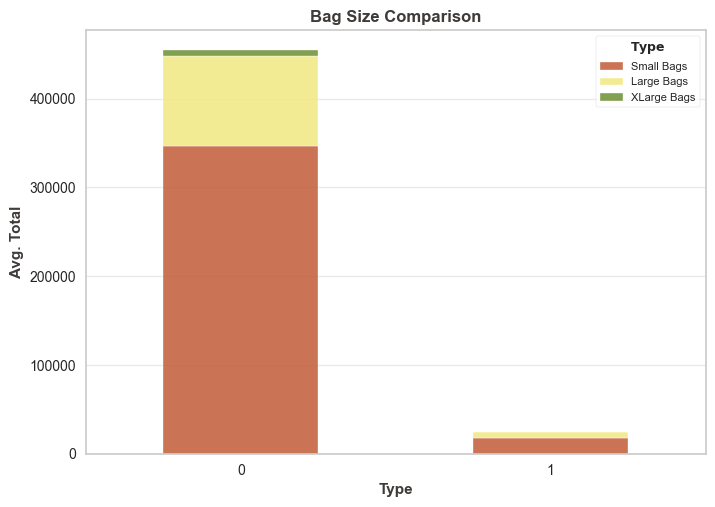

In [40]:
# --- Creating New Data Frame ---
eda31 = ds.loc[:, ['type', 'Small Bags', 'Large Bags', 'XLarge Bags']]
eda31 = eda31.groupby('type', as_index=False).mean()  # 그룹별 평균 계산

# --- Stacked Bar Chart ---
eda31.plot(
    kind='bar', stacked=True, color=color_mix[3:0:-1], alpha=0.85
)
plt.title(
    'Bag Size Comparison',
    fontweight='bold', fontsize=12, fontfamily='sans-serif', color=black_grad[1]
)
plt.xlabel('Type', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.ylabel('Avg. Total', fontweight='bold', fontsize=11, fontfamily='sans-serif', color=black_grad[1])
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(
    labels=['Small Bags','Large Bags','XLarge Bags'],
    title='$\\bf{Type}$', fontsize=8, title_fontsize=9,
    loc='upper right', frameon=True
)
plt.xticks(rotation=0)
plt.ticklabel_format(style='plain', axis='y')
plt.show()


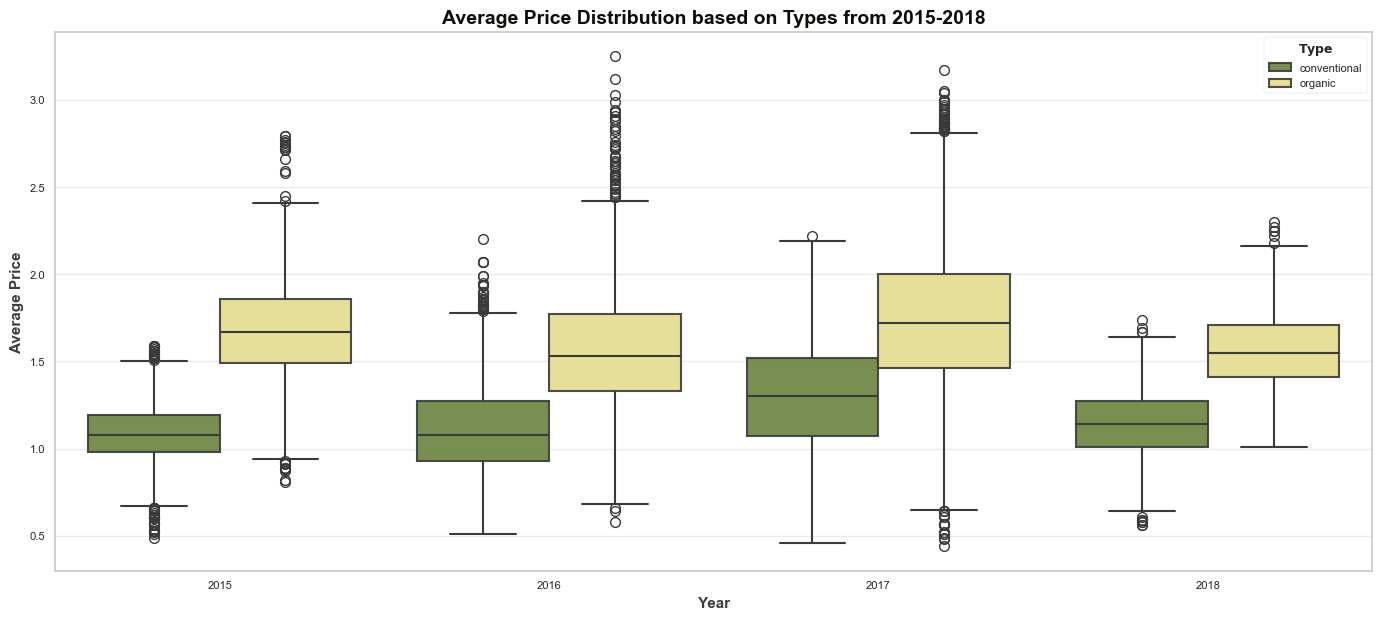

In [23]:
# --- Creating Box Plot based on Type ---
fig, ax = plt.subplots()
fig.set_size_inches(17, 7)
plt.title('Average Price Distribution based on Types from 2015-2018', fontweight='bold', fontsize = 14, 
          fontfamily = 'sans-serif', color = black_grad[0])
sns.boxplot(x = 'year', y = 'AveragePrice', hue = 'type', data = ds, ax = ax, palette = color_mix[1:3], 
            boxprops = dict(alpha = 0.9), linewidth = 1.5)
plt.xlabel('Year', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Average Price', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.xticks(fontsize = 8)
plt.yticks(fontsize = 8)
plt.legend(title = '$\\bf{Type}$', fontsize = 8, title_fontsize = 9, loc = 'upper right', frameon = True)
plt.grid(axis = 'y', alpha = 0.4)
plt.show()


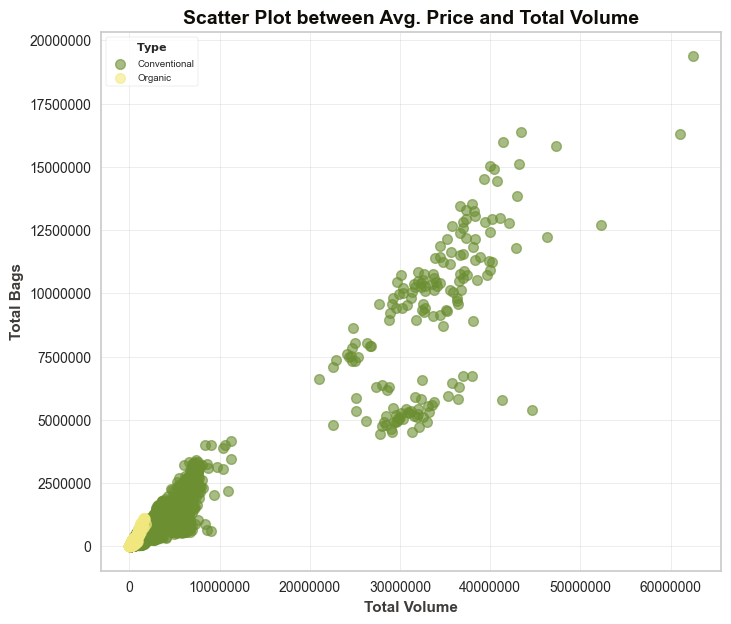

In [24]:
# --- Seperating Total Volume & Total Bags based on Type ---
x0 = ds.xs('Total Volume', axis = 1)[ds.type == 'conventional']
x1 = ds.xs('Total Volume', axis = 1)[ds.type == 'organic']
y0 = ds.xs('Total Bags', axis = 1)[ds.type == 'conventional']
y1 = ds.xs('Total Bags', axis = 1)[ds.type == 'organic']

# --- Creating Scatter Plot ---
plt.figure(figsize = (8, 7))
plt.title('Scatter Plot between Avg. Price and Total Volume', fontweight = 'bold', fontsize = 14, 
          fontfamily = 'sans-serif', color = black_grad[0])
plt.scatter(x = x0, y = y0, c = color_mix[1], alpha = 0.6, linewidths = 1)
plt.scatter(x = x1, y = y1, c = color_mix[2], alpha = 0.6, linewidths = 1)
plt.legend(['Conventional', 'Organic'], title = '$\\bf{Type}$', fontsize = 7, title_fontsize = 8, loc = 'upper left',
           frameon = True)
plt.xlabel('Total Volume', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ylabel('Total Bags', fontweight = 'bold', fontsize = 11, fontfamily = 'sans-serif', color = black_grad[1])
plt.ticklabel_format(style = 'plain', axis = 'both')
plt.grid(axis = 'both', alpha = 0.5, lw = 0.5)
plt.show()

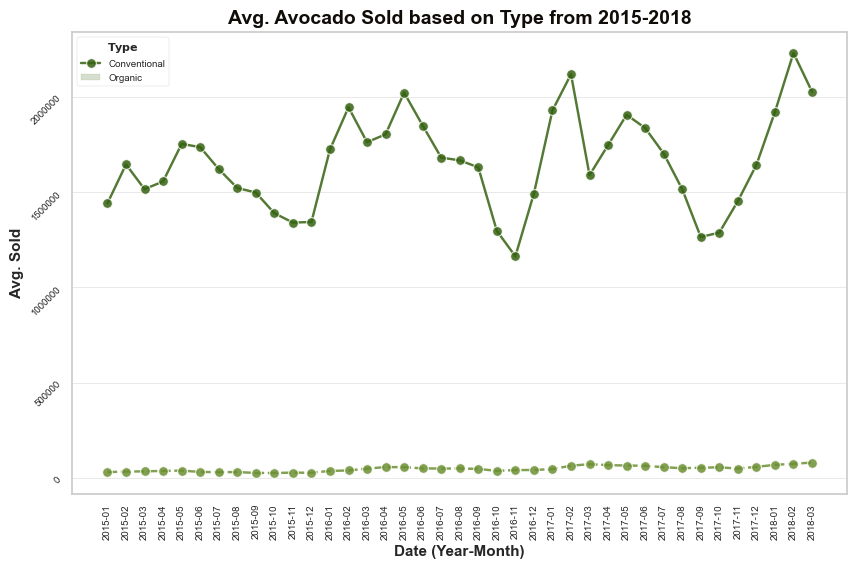

In [41]:
# --- Calculating Mean of `Total Volume` grouped by Type and Date ---
dseda8 = ds[['Date', 'Total Volume', 'type']].copy()
dseda8['Date'] = pd.to_datetime(dseda8['Date'])
dseda8['Date'] = dseda8['Date'].dt.strftime('%Y-%m')

mnth_avg8 = dseda8.groupby(['Date', 'type'], as_index=False).mean()  # reset_index 포함

# --- Creating Time Series Plot of Avg. Volume ---
plt.figure(figsize=(10, 6))
plt.title('Avg. Avocado Sold based on Type from 2015-2018',
          fontweight='bold', fontsize=14,
          fontfamily='sans-serif', color=black_grad[0])
sns.lineplot(
    data=mnth_avg8,
    x='Date',
    y='Total Volume',
    hue='type',
    style='type',
    markers=['o', 'o'],
    palette=color_mix[0:2],
    alpha=0.85
)
plt.xlabel('Date (Year-Month)', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Avg. Sold', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90, fontsize=7)  # 문자열 '90' -> 숫자 90
plt.yticks(rotation=45, fontsize=7)
plt.grid(axis='y', alpha=0.5, lw=0.6)
plt.grid(axis='x', alpha=0)
plt.legend(labels=['Conventional', 'Organic'],
           title='$\\bf{Type}$', fontsize=7, title_fontsize=8, frameon=True)
plt.show()


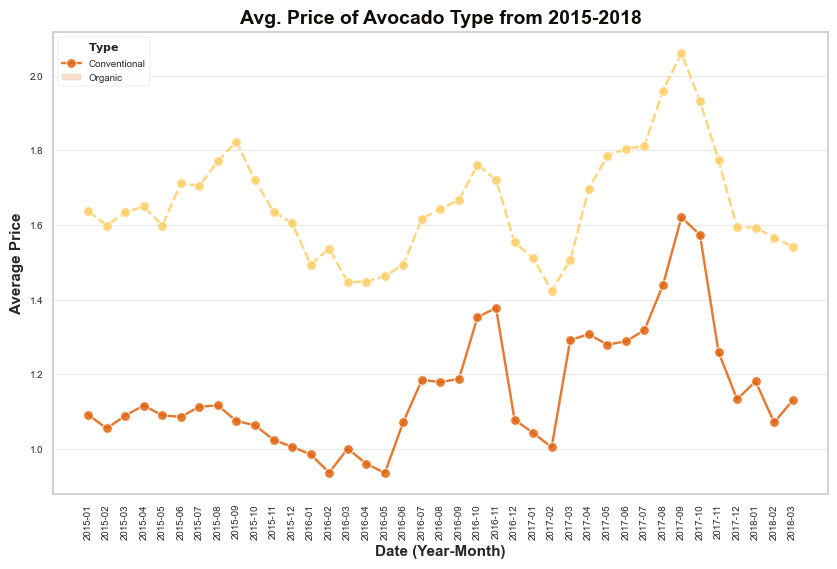

In [42]:
# --- Calculating Mean of `AveragePrice` grouped by Type and Date ---
dseda9 = ds[['Date', 'AveragePrice', 'type']].copy()
dseda9['Date'] = pd.to_datetime(dseda9['Date'])
dseda9['Date'] = dseda9['Date'].dt.strftime('%Y-%m')

mnth_avg9 = dseda9.groupby(['Date', 'type'], as_index=False).mean()  # MultiIndex 제거

# --- Creating Time Series Plot of Avg. Price ---
plt.figure(figsize=(10, 6))
plt.title('Avg. Price of Avocado Type from 2015-2018',
          fontweight='bold', fontsize=14, fontfamily='sans-serif', color=black_grad[0])
sns.lineplot(
    data=mnth_avg9,
    x='Date',
    y='AveragePrice',
    hue='type',
    style='type',
    markers=['o', 'o'],
    palette='YlOrBr_r',
    alpha=0.85
)
plt.xlabel('Date (Year-Month)', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ylabel('Average Price', fontweight='bold', fontsize=11, fontfamily='sans-serif')
plt.ticklabel_format(style='plain', axis='y')
plt.xticks(rotation=90, fontsize=7)  # '90' -> 숫자 90
plt.yticks(fontsize=7)
plt.grid(axis='y', alpha=0.5, lw=0.6)
plt.grid(axis='x', alpha=0)
plt.legend(labels=['Conventional', 'Organic'],
           title='$\\bf{Type}$', fontsize=7, title_fontsize=8,
           loc='upper left', frameon=True)
plt.show()


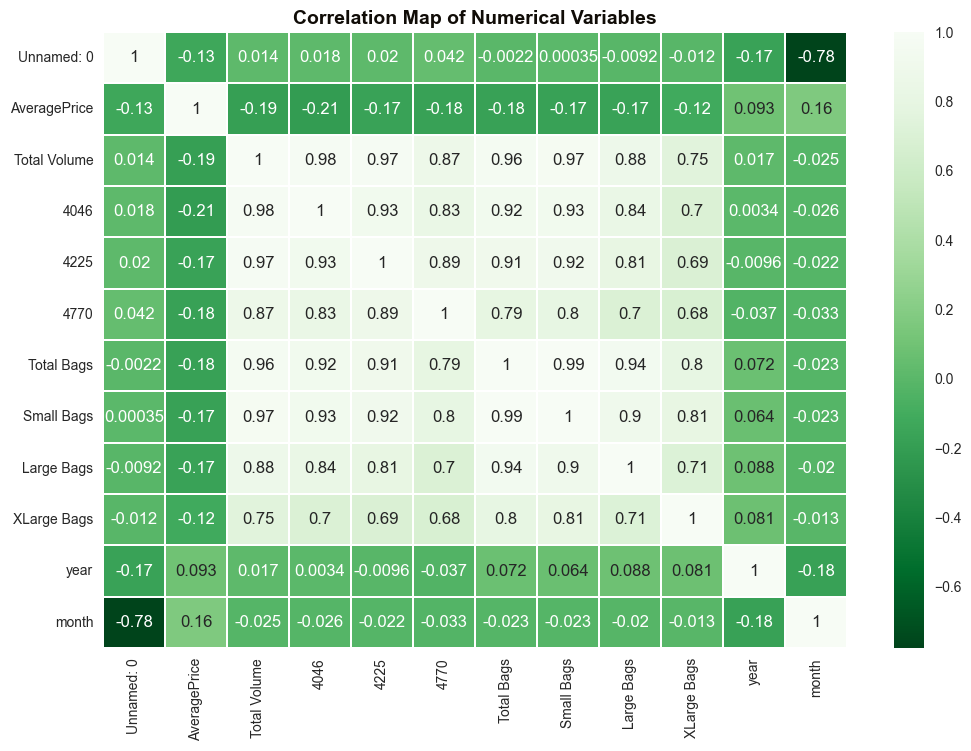

In [43]:

numeric_cols = ds.select_dtypes(include=np.number)

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_cols.corr(), annot=True, cmap='Greens_r', linewidths=0.1)
plt.title('Correlation Map of Numerical Variables', fontsize=14, fontweight='bold', fontfamily='sans-serif',
          color=black_grad[0])
plt.show()


In [28]:
# --- Change `Date` Format to 'datetime' ---
ds.Date = pd.to_datetime(ds.Date)

# --- Extracting Month Number from `Date`  ---
ds['month'] = pd.DatetimeIndex(ds['Date']).month

In [50]:
from pycaret.regression import setup

ds['Date'] = pd.to_datetime(ds['Date'])
ds['month'] = ds['Date'].dt.month

avc = setup(
    data=ds,
    target='AveragePrice',
    train_size=0.8,
    categorical_features=['type', 'year', 'region', 'month'],
    normalize=True,
    normalize_method='robust',
    session_id=123
)



,Description,Value
0,Session id,123
1,Target,AveragePrice
2,Target type,Regression
3,Original data shape,"(18249, 15)"
4,Transformed data shape,"(18249, 31)"
5,Transformed train set shape,"(14599, 31)"
6,Transformed test set shape,"(3650, 31)"
7,Numeric features,9
8,Date features,1
9,Categorical features,4


In [51]:
# --- List PyCaret Regression Models ---
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [54]:
# --- Comparing All Models ---
best_models = compare_models(sort='R2')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0739,0.0117,0.1081,0.9278,0.0434,0.0545,3.4200
catboost,CatBoost Regressor,0.0832,0.0130,0.1138,0.9199,0.0455,0.0608,2.5310
rf,Random Forest Regressor,0.0801,0.0132,0.1146,0.9187,0.0460,0.0592,6.7980
xgboost,Extreme Gradient Boosting,0.0843,0.0135,0.1159,0.9168,0.0463,0.0615,0.3040
lightgbm,Light Gradient Boosting Machine,0.0986,0.0174,0.1320,0.8922,0.0535,0.0731,0.1730
dt,Decision Tree Regressor,0.1115,0.0284,0.1685,0.8241,0.0673,0.0813,0.1670
gbr,Gradient Boosting Regressor,0.1380,0.0341,0.1846,0.7894,0.0740,0.1024,1.5700
knn,K Neighbors Regressor,0.1563,0.0466,0.2158,0.7122,0.0862,0.1153,0.1490
ada,AdaBoost Regressor,0.1825,0.0523,0.2285,0.6771,0.0949,0.1443,0.6750
ridge,Ridge Regression,0.1823,0.0583,0.2413,0.6401,0.0975,0.1373,0.0900


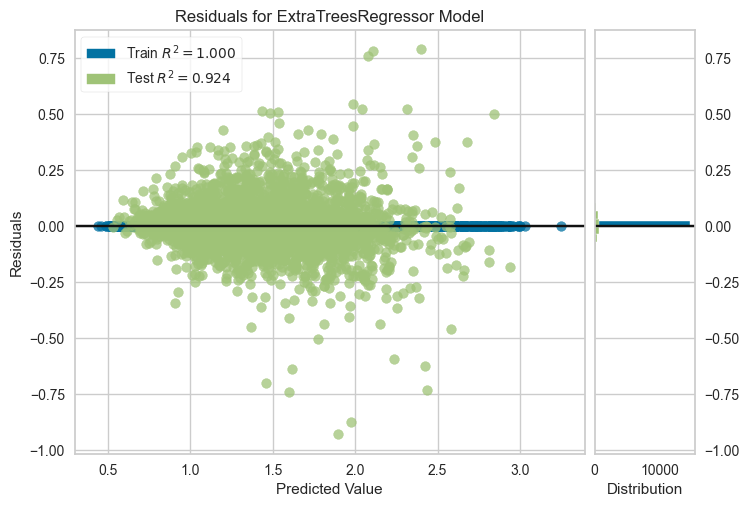

In [55]:
# --- Plot the Residual of Best Model (et) ---
plot_model(best_models)

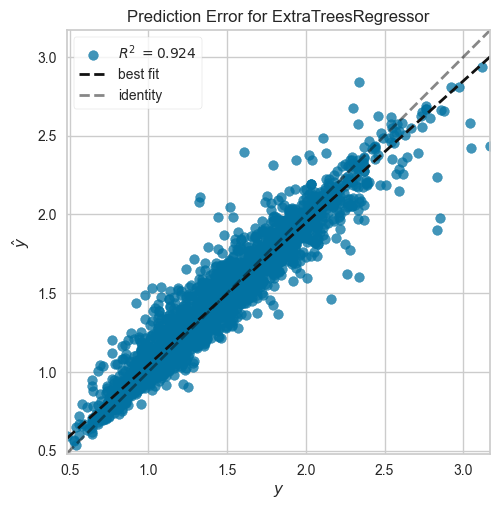

In [56]:
# --- Plot Error Prediction for Best Model ---
plot_model(best_models, plot = 'error')

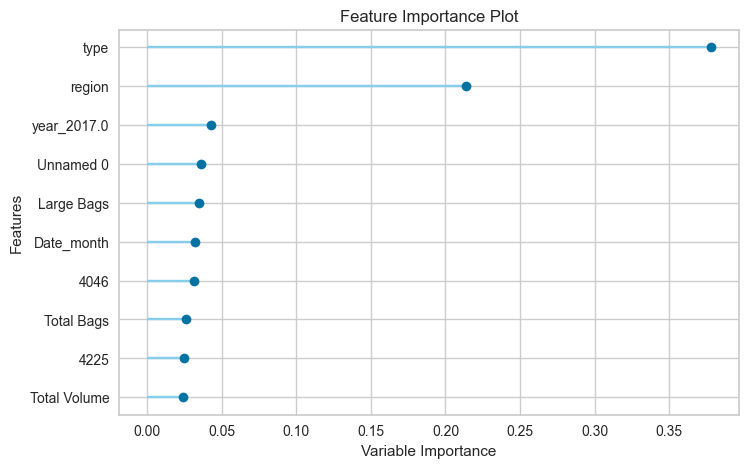

In [57]:
# --- Plot Feature Importance for Best Model ---
plot_model(best_models, plot = 'feature')

In [ ]:
# --- Tuning Best Model ---
tuned_best = tune_model(best_models)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,23:58:41
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Extra Trees Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


In [ ]:
# --- Plot the Residual of Tuned Best Model ---
plot_model(tuned_best)

In [ ]:
# --- Plot Error Prediction for Tuned Best Model ---
plot_model(tuned_best, plot = 'error')

In [ ]:
# --- Plot Feature Importance for Tuned Best Model ---
plot_model(tuned_best, plot = 'feature')

In [ ]:
# --- Create RFR Model ---
rf = create_model('rf')

In [ ]:
# --- Plot the Residual of RFR Model ---
plot_model(rf)

In [ ]:
# --- Plot Error Prediction for RFR Model ---
plot_model(rf, plot = 'error')

In [ ]:
# --- Plot Feature Importance for RFR Model --
plot_model(rf, plot = 'feature')

In [ ]:
# --- Tuning RFR Model ---
tune_rf = tune_model(rf)

In [ ]:
# --- Plot the Residual of RFR Model ---
plot_model(tune_rf)

In [ ]:
# --- Plot Error Prediction for Tuned RFR Model ---
plot_model(tune_rf, plot = 'error')

In [ ]:
# --- Plot Feature Importance for Tuned RFR Model ---
plot_model(tune_rf, plot = 'feature')

In [ ]:
# --- Create Light GBM ---
lgbm = create_model('lightgbm')

In [ ]:
# --- Plot the Residual of Light GBM ---
plot_model(lgbm)

In [ ]:
# --- Plot Error Prediction for Light GBM ---
plot_model(lgbm, plot = 'error')

In [ ]:
# --- Plot Feature Importance for Light GBM --
plot_model(lgbm, plot = 'feature')

In [ ]:
# --- Tuning Light Gradient Boost ---
tune_lgbm = tune_model(lgbm)

In [ ]:
# --- Plot the Residual of Tuned Light Gradient Boost ---
plot_model(tune_lgbm)

In [ ]:
# --- Plot Error Prediction for Tuned Light Gradient Boost ---
plot_model(tune_lgbm, plot = 'error')

In [ ]:
# --- Plot Feature Importance for Tuned Light Gradient Boost --
plot_model(tune_lgbm, plot = 'feature')

In [ ]:
# --- Prediction using Best Model ---
predict_model(best_models)

In [ ]:
# --- Prediction using RFR Model ---
predict_model(rf)

In [ ]:
# --- Prediction using Light Gradient Boosting Model ---
predict_model(lgbm)

In [ ]:
# --- Finalize Best Model ---
final_best = finalize_model(best_models)

# --- Final Best Model Parameters for Deployment ---
plot_model(best_models, plot='parameter')

In [ ]:
# --- Prediction using Final Model ---
predict_model(final_best)

In [ ]:
# --- Save Final Model into Pickle File ---
save_model(final_best,'Final_Best_Model_caesarmario_06May2022')